In [1]:
import numpy as np
import librosa
from scipy.io import wavfile
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import soundfile as sf
from tqdm import tqdm_notebook as tqdm

In [2]:
def read_test(wav_path):
    try:
        sr, x = wavfile.read(wav_path)
        assert sr == 16000
        return x / np.max(np.abs(x))
    except Exception as e:
        print("Error with getting feature from %s: %s" % (wav_path, str(e)))
        return None
def read_scipy(wav_path, length=100000):
    try:
        sr, x = wavfile.read(wav_path)
        assert sr == 16000
        if length > len(x):
            x = np.concatenate([x] * int(np.ceil(length/len(x))))
        feature = x[:length]
        return feature / np.max(np.abs(feature))
    except Exception as e:
        print("Error with getting feature from %s: %s" % (wav_path, str(e)))
        return None
def universe_reader(file_path, length=None):
    if '.flac' in file_path:
        try:
            x, sr = sf.read(file_path)                                            
            assert sr == 16000
            if length is not None and length > len(x):
                x = np.concatenate([x] * int(np.ceil(length/len(x))))
            else:
                length = len(x)
            feature = x[:length]
            return feature / np.max(np.abs(feature))
        except Exception as e:
            print("Error with getting feature from %s: %s" % (file_path, str(e)))
            return None
    elif ".wav" in file_path:
        try:
            sr, x = wavfile.read(file_path)
            assert sr == 16000
            if length is not None and length > len(x):
                x = np.concatenate([x] * int(np.ceil(length/len(x))))
            else:
                length = len(x)
            feature = x[:length]
            return feature / np.max(np.abs(feature))
        except Exception as e:
            print("Error with getting feature from %s: %s" % (file_path, str(e)))
            return None
    else:
        raise NotImplementedError("Only wav and flac formats supported, file_path=" + file_path)

In [3]:
files = glob.glob("/media/data/AVSantispoof/ASV2019_humans/*flac")
wav_files = glob.glob("/home/vfilin/Desktop/voice_as_contest/Training_Data/human/*wav")
wav_spoof_files =  glob.glob("/home/vfilin/Desktop/voice_as_contest/Training_Data/spoof/*wav")

In [4]:
len(files), len(wav_files), len(wav_spoof_files)

(28890, 10322, 39678)

In [5]:
flac_len = []
for fp in tqdm(files):
    data = universe_reader(fp)
    flac_len.append(len(data))

In [6]:
wav_len = []
for fp in tqdm(wav_files):
    data = universe_reader(fp)
    wav_len.append(len(data))

(array([ 768., 5506., 8787., 7094., 3942., 1686.,  626.,  277.,  151.,
          53.]),
 array([ 23311.,  35926.,  48541.,  61156.,  73771.,  86386.,  99001.,
        111616., 124231., 136846., 149461.]),
 <a list of 10 Patch objects>)

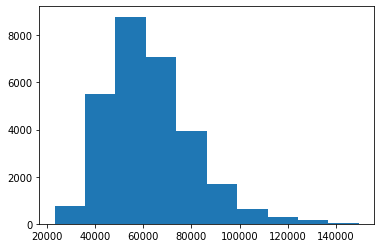

In [7]:
plt.hist(flac_len)

(array([4922., 1873., 1033.,  511.,  325.,  233.,  171.,  156.,  228.,
         870.]),
 array([ 40320.,  52512.,  64704.,  76896.,  89088., 101280., 113472.,
        125664., 137856., 150048., 162240.]),
 <a list of 10 Patch objects>)

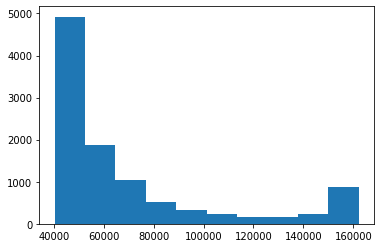

In [8]:
plt.hist(wav_len)

In [ ]:
1+1